In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import os
import shutil
import random
from pathlib import Path
import numpy as np

n_folds = 10
batch_size=8
input_shape=[200,200,3]

In [7]:
# Set up the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
)
# Set up the KFold cross-validation
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [8]:
# Model definition
def create_cnn_model():
    cnn = tf.keras.models.Sequential()
    cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation ='relu',  padding='same', input_shape=[200,200,3]))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Dropout(0.20))

    cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation ='relu', padding='same'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Dropout(0.20))

    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu', padding='same'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Dropout(0.20))
    
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu', padding='same'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    cnn.add(tf.keras.layers.Dropout(0.20))

    cnn.add(tf.keras.layers.Flatten())

    cnn.add(tf.keras.layers.Dense(units= 256, activation = 'relu'))
    cnn.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

    cnn.compile(optimizer = opt, loss = 'binary_focal_crossentropy', metrics = ['accuracy'])
    cnn.summary()

    return cnn



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 100, 100, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 50, 50, 16)       

Found 1916 images belonging to 2 classes.
Found 214 images belonging to 2 classes.
Training : fold1
Epoch 1/8
240/240 [==============================] - 25s 98ms/step - loss: 0.1591 - accuracy: 0.6388 - val_loss: 0.1521 - val_accuracy: 0.6776
Epoch 2/8
240/240 [==============================] - 23s 96ms/step - loss: 0.1426 - accuracy: 0.7004 - val_loss: 0.1471 - val_accuracy: 0.6963
Epoch 3/8
240/240 [==============================] - 23s 95ms/step - loss: 0.1348 - accuracy: 0.7323 - val_loss: 0.1408 - val_accuracy: 0.7150
Epoch 4/8
240/240 [==============================] - 23s 97ms/step - loss: 0.1251 - accuracy: 0.7589 - val_loss: 0.1466 - val_accuracy: 0.7009
Epoch 5/8
240/240 [==============================] - 22s 93ms/step - loss: 0.1181 - accuracy: 0.7735 - val_loss: 0.1312 - val_accuracy: 0.7430
Epoch 6/8
240/240 [==============================] - 22s 93ms/step - loss: 0.1094 - accuracy: 0.8058 - val_loss: 0.1323 - val_accuracy: 0.7336
Epoch 7/8
240/240 [=======================

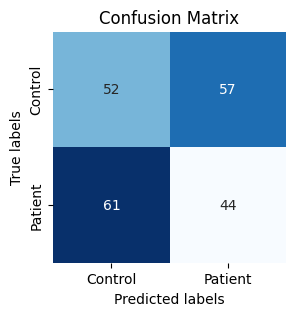

27/27 [==============================] - 1s 22ms/step - loss: 0.1108 - accuracy: 0.8037
Fold 1 Test Loss: 0.11083292216062546, Test Accuracy: 0.8037382960319519
Found 1917 images belonging to 2 classes.
Found 213 images belonging to 2 classes.
Training : fold2
Epoch 1/8
240/240 [==============================] - 22s 93ms/step - loss: 0.0842 - accuracy: 0.8529 - val_loss: 0.0840 - val_accuracy: 0.8826
Epoch 2/8
240/240 [==============================] - 22s 92ms/step - loss: 0.0801 - accuracy: 0.8675 - val_loss: 0.0803 - val_accuracy: 0.9061
Epoch 3/8
240/240 [==============================] - 22s 91ms/step - loss: 0.0660 - accuracy: 0.9030 - val_loss: 0.0742 - val_accuracy: 0.9108
Epoch 4/8
240/240 [==============================] - 22s 92ms/step - loss: 0.0612 - accuracy: 0.8978 - val_loss: 0.0719 - val_accuracy: 0.9108
Epoch 5/8
240/240 [==============================] - 22s 92ms/step - loss: 0.0553 - accuracy: 0.9212 - val_loss: 0.0630 - val_accuracy: 0.9108
Epoch 6/8
240/240 [=====

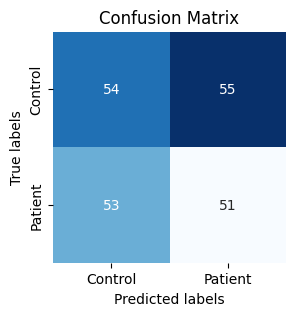

27/27 [==============================] - 1s 22ms/step - loss: 0.0490 - accuracy: 0.9343
Fold 2 Test Loss: 0.04897858202457428, Test Accuracy: 0.934272289276123
Found 1917 images belonging to 2 classes.
Found 213 images belonging to 2 classes.
Training : fold3
Epoch 1/8
240/240 [==============================] - 22s 91ms/step - loss: 0.0328 - accuracy: 0.9577 - val_loss: 0.0270 - val_accuracy: 0.9859
Epoch 2/8
240/240 [==============================] - 22s 91ms/step - loss: 0.0230 - accuracy: 0.9703 - val_loss: 0.0404 - val_accuracy: 0.9437
Epoch 3/8
240/240 [==============================] - 23s 98ms/step - loss: 0.0214 - accuracy: 0.9729 - val_loss: 0.0233 - val_accuracy: 0.9718
Epoch 4/8
240/240 [==============================] - 23s 96ms/step - loss: 0.0174 - accuracy: 0.9776 - val_loss: 0.0215 - val_accuracy: 0.9765
Epoch 5/8
240/240 [==============================] - 26s 109ms/step - loss: 0.0153 - accuracy: 0.9828 - val_loss: 0.0216 - val_accuracy: 0.9765
Epoch 6/8
240/240 [=====

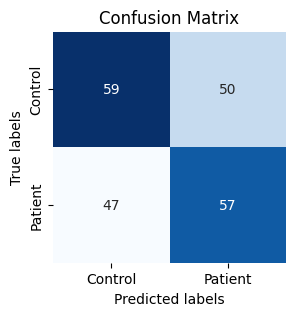

27/27 [==============================] - 1s 32ms/step - loss: 0.0170 - accuracy: 0.9859
Fold 3 Test Loss: 0.017027700319886208, Test Accuracy: 0.98591548204422
Found 1917 images belonging to 2 classes.
Found 213 images belonging to 2 classes.
Training : fold4
Epoch 1/8
240/240 [==============================] - 29s 120ms/step - loss: 0.0116 - accuracy: 0.9854 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 2/8
240/240 [==============================] - 27s 112ms/step - loss: 0.0087 - accuracy: 0.9896 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3/8
240/240 [==============================] - 27s 114ms/step - loss: 0.0091 - accuracy: 0.9875 - val_loss: 0.0080 - val_accuracy: 0.9906
Epoch 4/8
240/240 [==============================] - 27s 112ms/step - loss: 0.0068 - accuracy: 0.9922 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/8
240/240 [==============================] - 26s 110ms/step - loss: 0.0041 - accuracy: 0.9974 - val_loss: 0.0034 - val_accuracy: 0.9953
Epoch 6/8
240/240 [=

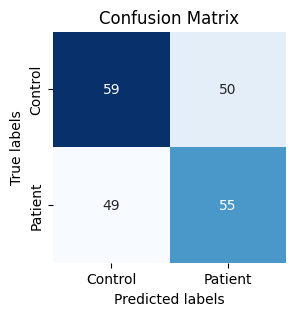

27/27 [==============================] - 1s 24ms/step - loss: 0.0066 - accuracy: 0.9953
Fold 4 Test Loss: 0.006574492901563644, Test Accuracy: 0.9953051805496216
Found 1917 images belonging to 2 classes.
Found 213 images belonging to 2 classes.
Training : fold5
Epoch 1/8
240/240 [==============================] - 24s 101ms/step - loss: 0.0056 - accuracy: 0.9943 - val_loss: 0.0058 - val_accuracy: 0.9953
Epoch 2/8
240/240 [==============================] - 25s 106ms/step - loss: 0.0037 - accuracy: 0.9953 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/8
240/240 [==============================] - 25s 105ms/step - loss: 0.0046 - accuracy: 0.9963 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/8
240/240 [==============================] - 27s 111ms/step - loss: 0.0048 - accuracy: 0.9932 - val_loss: 0.0034 - val_accuracy: 0.9953
Epoch 5/8
240/240 [==============================] - 26s 108ms/step - loss: 0.0053 - accuracy: 0.9917 - val_loss: 0.0116 - val_accuracy: 0.9953
Epoch 6/8
240/240 

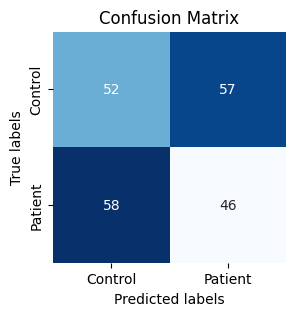

27/27 [==============================] - 1s 25ms/step - loss: 0.0100 - accuracy: 0.9953
Fold 5 Test Loss: 0.010006179101765156, Test Accuracy: 0.9953051805496216
Found 1917 images belonging to 2 classes.
Found 213 images belonging to 2 classes.
Training : fold6
Epoch 1/8
240/240 [==============================] - 25s 105ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0068 - val_accuracy: 0.9859
Epoch 2/8
240/240 [==============================] - 25s 103ms/step - loss: 0.0077 - accuracy: 0.9885 - val_loss: 0.0024 - val_accuracy: 0.9953
Epoch 3/8
240/240 [==============================] - 25s 105ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/8
240/240 [==============================] - 25s 103ms/step - loss: 0.0012 - accuracy: 0.9990 - val_loss: 7.9408e-04 - val_accuracy: 1.0000
Epoch 5/8
240/240 [==============================] - 24s 100ms/step - loss: 5.6027e-04 - accuracy: 1.0000 - val_loss: 5.3192e-04 - val_accuracy: 1.0000
Epoch 

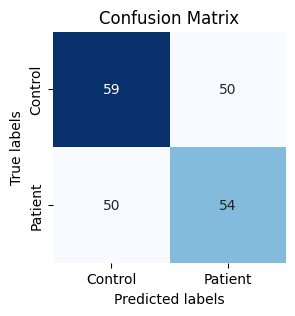

27/27 [==============================] - 1s 30ms/step - loss: 0.0023 - accuracy: 1.0000
Fold 6 Test Loss: 0.002307689981535077, Test Accuracy: 1.0
Found 1917 images belonging to 2 classes.
Found 213 images belonging to 2 classes.
Training : fold7
Epoch 1/8
240/240 [==============================] - 25s 104ms/step - loss: 6.4882e-04 - accuracy: 1.0000 - val_loss: 5.5940e-04 - val_accuracy: 1.0000
Epoch 2/8
240/240 [==============================] - 24s 101ms/step - loss: 6.1901e-04 - accuracy: 1.0000 - val_loss: 3.2731e-04 - val_accuracy: 1.0000
Epoch 3/8
240/240 [==============================] - 24s 100ms/step - loss: 4.8837e-04 - accuracy: 1.0000 - val_loss: 9.7201e-04 - val_accuracy: 1.0000
Epoch 4/8
240/240 [==============================] - 24s 100ms/step - loss: 0.0035 - accuracy: 0.9943 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/8
240/240 [==============================] - 25s 103ms/step - loss: 0.0046 - accuracy: 0.9943 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/8

KeyboardInterrupt: 

In [9]:
# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(kfold.split(np.arange(n_folds))):

     # Load the data for this fold

    train_data = train_datagen.flow_from_directory(f'folds/fold_{fold+1}/train', 
                                                   target_size=(200, 200), 
                                                   batch_size=batch_size, 
                                                   class_mode='binary')
    test_data = train_datagen.flow_from_directory(f'folds/fold_{fold+1}/test', 
                                                 target_size=(200, 200), 
                                                 batch_size=batch_size, 
                                                 class_mode='binary')
    
    cnn = create_cnn_model()

    # Train the model for this fold
    print(f'Training : fold{fold+1}')
    history = cnn.fit(train_data, epochs=8, validation_data=test_data)

    ##Confusion Matrix Generator and ROC Curve
    y_pred_real = cnn.predict(test_data)
    y_pred = [int(p >= 0.5) for p in y_pred_real] ##With sigmoid 1 neuron
    y_true = test_data.classes
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(test_data.classes, y_pred)
    class_names = test_data.class_indices.keys()
    import seaborn as sns
    # Plot the confusion matrix as an image
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

    #Evaluate the model on the test data for this fold
    test_loss, test_acc = cnn.evaluate(test_data)
    print(f'Fold {fold+1} Test Loss: {test_loss}, Test Accuracy: {test_acc}')